<a href="https://colab.research.google.com/github/5791nbm/FinCoLab/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capital Asset Pricing Model (CAPM)

E[r<sub>a</sub>] = r<sub>f</sub> + B<sub>a</sub>(E[r<sub>m</sub>] - r<sub>f</sub>)

Expression of linear relationship between any stock and expected return and the market premium


*   E[r<sub>a</sub>] is the Expected return of investment A (a single stock or portfolio)
*   r<sub>f</sub> is the risk free rate of return for a "riskless" asset
*   (E[r<sub>m</sub>] - r<sub>f</sub>) is the excess return of the market premium multiplied by a factor
*   B<sub>a</sub> = Cov(r<sub>a</sub>,r<sub>m</sub>) / Var(r<sub>m</sub>). Defines how risky your portfolio is relative to the market or how much the price of a stock goes up or down relative to the market.

# Linear Regression Formula:

E[r<sub>a</sub>] - r<sub>f</sub> = *a* + B<sub>a</sub>(E[r<sub>m</sub>] - r<sub>f</sub>)




In [84]:
import numpy as np, pandas as pd, yfinance as yf, matplotlib.pyplot as plt
from scipy.stats import norm

RISK_FREE_RATE = 0.05
MONTH_IN_YEAR = 12

https://www.youtube.com/watch?v=037_883wHGo

In [27]:
yf.__version__
# Version 0.2.51 published 12/24/2024
# Key changes include a multi index column and auto adjusted prices for splits, dividends and any other adjustment reasons

'0.2.51'

In [31]:
df_ = yf.download(['IBM', '^GSPC'],start='2024-01-01')
df_.resample('ME').last()
#df_

[*********************100%***********************]  2 of 2 completed


Price            Close                     High                      Low  \
Ticker             IBM        ^GSPC         IBM        ^GSPC         IBM   
Date                                                                       
2024-01-31  177.252319  4845.649902  181.103103  4906.750000  176.750457   
2024-02-29  180.202576  5096.270020  181.975099  5104.990234  179.871450   
2024-03-31  185.977875  5254.350098  186.922554  5264.850098  185.374040   
2024-04-30  161.863861  5035.689941  162.409248  5110.830078  160.948383   
2024-05-31  164.109985  5277.509766  164.228010  5280.330078  161.149406   
2024-06-30  170.109802  5460.479980  170.611437  5523.640137  167.729545   
2024-07-31  188.984665  5522.299805  191.355091  5551.509766  186.869978   
2024-08-31  200.549454  5648.399902  200.589134  5651.370117  197.176031   
2024-09-30  219.351273  5762.479980  219.589401  5765.140137  217.307383   
2024-10-31  205.103561  5705.450195  206.502540  5775.339844  201.918655   
2024-11-30  227.410004  6032.379883  230.360001  6044.169922  227.190002   
2024-12-31  219.830002  5881.629883  221.050003  5929.740234  218.440002   
2025-01-31  223.139999  6039.390137  227.449997  6050.189941  222.830200   

Price                          Open                Volume              
Ticker            ^GSPC         IBM        ^GSPC      IBM       ^GSPC  
Date                                                                   
2024-01-31  4845.149902  180.524046  4899.189941  8876100  4696120000  
2024-02-29  5061.890137  181.293350  5085.359863  6458500  5219740000  
2024-03-31  5245.819824  185.958392  5248.029785  3742200  3998270000  
2024-04-30  5035.310059  162.146303  5103.779785  6011600  4082470000  
2024-05-31  5191.680176  162.978862  5243.209961  4905000  5437160000  
2024-06-30  5451.120117  168.044298  5488.479980  4193300  7199220000  
2024-07-31  5493.750000  187.863387  5505.589844  5558400  4546910000  
2024-08-31  5581.790039  197.553064  5612.740234  4751000  4185850000  
2024-09-30  5703.529785  218.924627  5726.520020  3543400  4425730000  
2024-10-31  5702.859863  202.533817  5775.339844  5925300  4425660000  
2024-11-30  6003.979980  227.750000  6003.979980  2640300  2444420000  
2024-12-31  5868.859863  220.720001  5919.740234  2270200  3128350000  
2025-01-31  6006.879883  224.990005  6014.120117  2583485  1780390000

In [29]:
df_.xs('IBM', axis=1, level='Ticker')

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,155.865479,157.593021,154.861769,157.149078,3825000
2024-01-03,154.514313,156.087434,154.495006,155.382907,4086100
2024-01-04,155.247803,156.164656,154.581874,154.630132,3212000
2024-01-05,153.607117,154.948621,153.134207,154.330950,4199400
2024-01-08,155.518021,155.595231,152.381409,153.153501,3321700
...,...,...,...,...,...
2025-01-14,217.750000,218.130005,214.610001,218.000000,3485500
2025-01-15,220.029999,221.679993,218.009995,220.869995,2951600
2025-01-16,222.660004,222.679993,217.380005,219.690002,3329100


In [14]:
df_.xs('^GSPC', axis=1, level='Ticker')

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,4742.830078,4754.330078,4722.669922,4745.200195,3743050000
2024-01-03,4704.810059,4729.290039,4699.709961,4725.069824,3950760000
2024-01-04,4688.680176,4726.779785,4687.529785,4697.419922,3715480000
2024-01-05,4697.240234,4721.490234,4682.109863,4690.569824,3844370000
2024-01-08,4763.540039,4764.540039,4699.819824,4703.700195,3742320000
...,...,...,...,...,...
2025-01-14,5842.910156,5871.919922,5805.419922,5859.270020,4142280000
2025-01-15,5949.910156,5960.609863,5905.209961,5905.209961,4544570000
2025-01-16,5937.339844,5964.689941,5930.720215,5963.609863,4285810000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



            s_adjclose   m_adjclose  s_returns  m_returns
Date                                                     
2010-01-31   69.085960  1073.869995  -0.067221  -0.037675
2010-02-28   72.099556  1104.489990   0.042696   0.028115
2010-03-31   72.717560  1169.430054   0.008535   0.057133
2010-04-30   73.142822  1186.689941   0.005831   0.014651
2010-05-31   71.386307  1089.410034  -0.024308  -0.085532
...                ...          ...        ...        ...
2016-08-31  104.837776  2170.949951  -0.002292  -0.001220
2016-09-30  104.817986  2168.270020  -0.000189  -0.001235
2016-10-31  101.413109  2126.149902  -0.033023  -0.019617
2016-11-30  108.012756  2198.810059   0.063047   0.033604
2016-12-31  110.522980  2238.830078   0.022974   0.018037

[84 rows x 4 columns]
Beta from the formula:  0.7301121257990872
Beta from the regression:  0.7301121257990872
Expected return:  0.08619367921202367


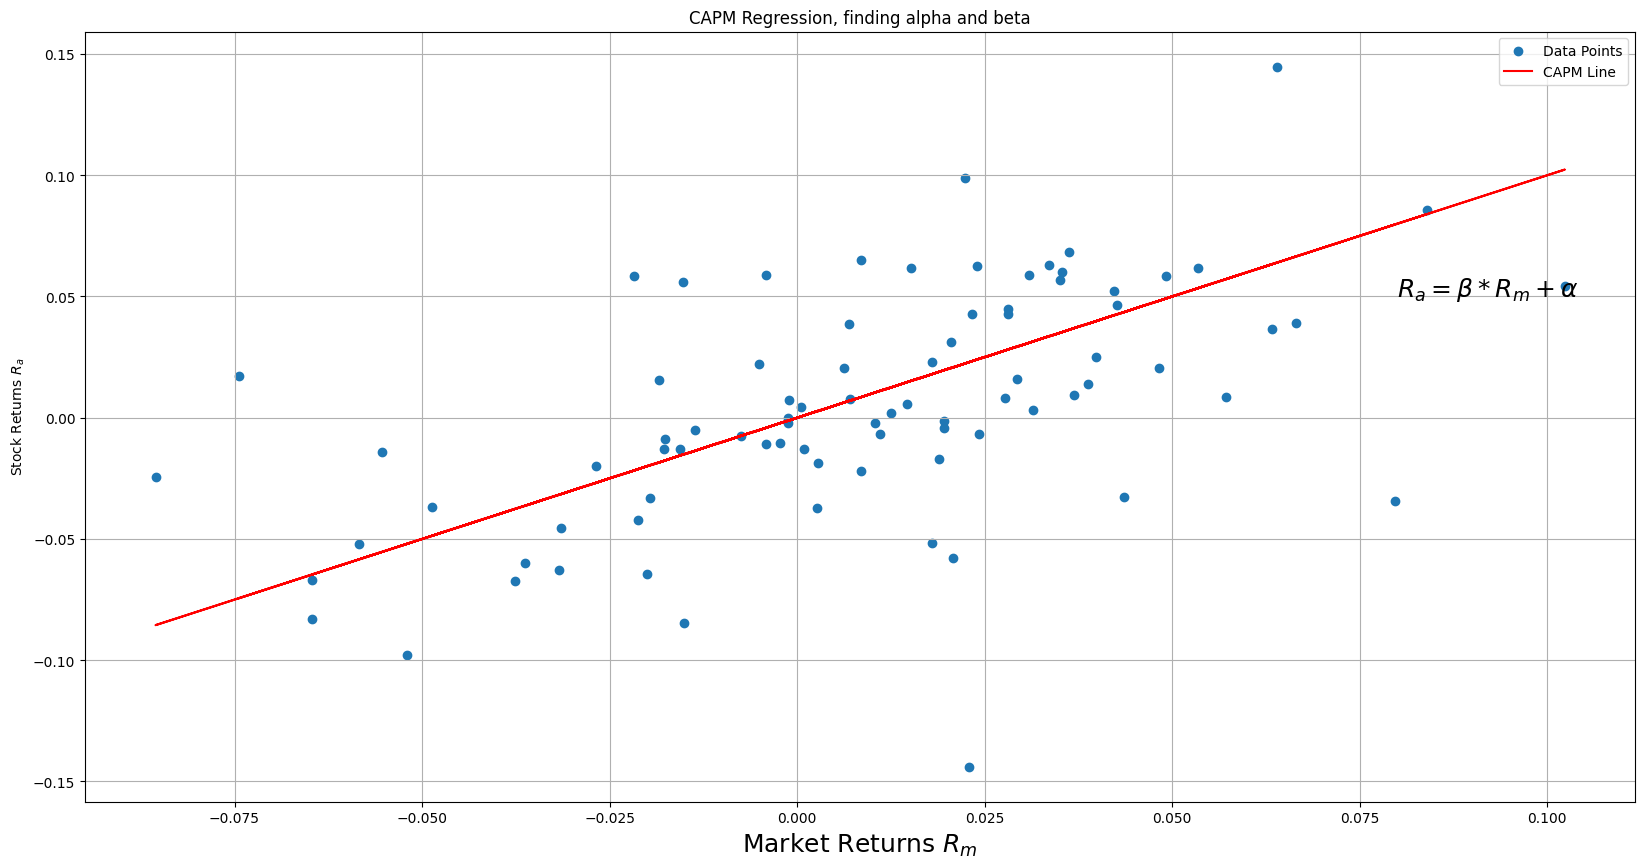

In [83]:
class CAPM:
  def __init__(self, stocks, start_date, end_date):
    self.data = None
    self.stocks = stocks
    self.start_date = start_date
    self.end_date = end_date

  def download_data(self):
    data = {}
    for stock in self.stocks:
      ticker = yf.download(stock, self.start_date, self.end_date, auto_adjust= False)
      #This is a line of code I added to handle changes with yfinance library
      ticker = ticker.xs(stock, axis= 1, level= 'Ticker')
      data[stock] = ticker['Adj Close']
      #This line of code remnames the column to the stock ticket symbol
      ticker = ticker.rename(columns= {'Adj Close': stock})
    return pd.DataFrame(data)

  def initialize(self):
    stock_data = self.download_data()
    '''
    I used ".resample('ME').last()" to get the price of the stock at the end of the month 'M' depricated, now 'ME'
    Use daily returns if you want to deal with micro data for short-term forecasting. Use monthly returns since they are approximately
    normally distributed, which is a key assmuption of the CAPM.
    '''
    stock_data = stock_data.resample('ME').last()
    print()
    #print(stock_data)
    self.data = pd.DataFrame({'s_adjclose':stock_data[self.stocks[0]], 'm_adjclose': stock_data[self.stocks[1]]})

    #logarithmic monthly returns
    self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_adjclose', 'm_adjclose']]/ self.data[['s_adjclose', 'm_adjclose']].shift(1))
    self.data.dropna(inplace=True)
    print(self.data)

  def calc_beta(self):
    '''
    covar matrix: the diagonal items are the variance
    off diagonal are the covariances
    the matrix is symmetric: cov[0,1] = cov[1,0]
    '''
    covariance_matrix = np.cov(self.data['s_returns'], self.data['m_returns'])
    beta = covariance_matrix[0,1]/covariance_matrix[1,1]
    print("Beta from the formula: ", beta)

  def regression(self):
    '''
    Use a linear regression to calculate the beta
    '''
    beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg= 1) #deg=1 is linear, deg=2 poly is degree 2
    print("Beta from the regression: ", beta)
    #Calculate the expected return according to CAPM formula. Since we are after annual return we multiple by 12
    expected_return = RISK_FREE_RATE + beta * (self.data['m_returns'].mean() * MONTH_IN_YEAR - RISK_FREE_RATE)
    print("Expected return: ", expected_return)
    #self.plot_regression(alpha, beta)

  def plot_regression(self, alpha, beta):
    fig, axis = plt.subplots(1, figsize=(20,10))
    axis.scatter(self.data['m_returns'], self.data['s_returns'], label='Data Points')
    axis.plot(self.data['m_returns'], beta * self.data['m_returns'] + alpha, color='red', label='CAPM Line')
    plt.title('CAPM Regression, finding alpha and beta')
    plt.xlabel('Market Returns $R_m$', fontsize= 18)
    plt.ylabel('Stock Returns $R_a$')
    plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize= 18)
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
  capm = CAPM(['IBM', '^GSPC'], '2009-12-01', '2017-01-01')
  capm.initialize()
  capm.calc_beta()
  capm.regression()
  capm.plot_regression(0, 1)

[*********************100%***********************]  1 of 1 completed


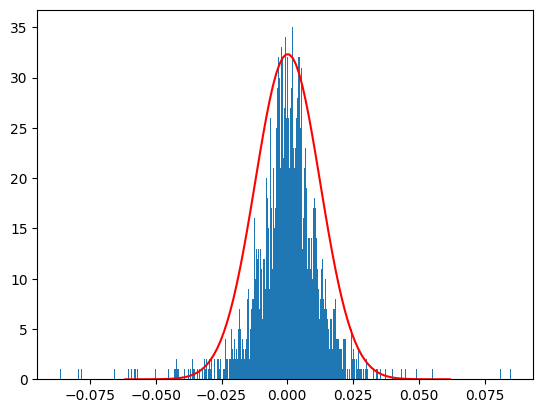

In [97]:
def download_data(stock, start_date, end_date):
  data = {}
  ticker = yf.download(stock, start_date, end_date, auto_adjust= False).xs(stock, axis= 1, level= 'Ticker')
  data['Price'] = ticker['Adj Close']
  return pd.DataFrame(data)

def calculate_returns(stock_data):
  stock_data['Price'] = np.log(stock_data['Price'] / stock_data['Price'].shift(1))
  stock_data.dropna(inplace=True)
  return stock_data

def show(stock_data):
  plt.hist(stock_data, bins=700)
  stock_variance = stock_data.var()
  stock_mean = stock_data.mean()
  sigma = np.sqrt(stock_variance)
  x = np.linspace(stock_mean - 5 * sigma, stock_mean + 5 * sigma, 100)
  plt.plot(x, norm.pdf(x, stock_mean, sigma), color='red')
  plt.show()

if __name__ == '__main__':
  stock_data = download_data('IBM', '2009-12-01', '2020-01-01')
  show(calculate_returns(stock_data))